In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aniketpal0001","key":"cedbce2bb16967f0be583aafac73a563"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to the kaggle directory
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json in kaggle

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d biaiscience/dogs-vs-cats

 99% 810M/817M [00:07<00:00, 128MB/s]
100% 817M/817M [00:10<00:00, 85.3MB/s]


In [ ]:
import zipfile
zip = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip.extractall('/content')
zip.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D,MaxPooling2D,Flatten

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
df_path = '/content/train/train'

In [ ]:
import os
import numpy as np
import pandas as pd
import shutil

In [ ]:
dog_folder = '/content/dogs'
cat_folder = '/content/cats'

In [ ]:
os.makedirs(dog_folder,exist_ok=True)
os.makedirs(cat_folder,exist_ok=True)


In [ ]:
folder = os.listdir(df_path)

for file in folder:
    if 'dog.' in file:
        shutil.move(os.path.join(df_path, file),os.path.join(dog_folder,file))
    elif 'cat.' in file:
        shutil.move(os.path.join(df_path, file),os.path.join(cat_folder,file))

In [ ]:
def move_files(source_folder, destination_folder, file_list):
    os.makedirs(destination_folder, exist_ok=True)
    for file in file_list:
        shutil.move(os.path.join(source_folder, file), os.path.join(destination_folder, file))

In [ ]:
train_folder = '/content/data_set/train'
test_folder = '/content/data_set/test'

In [ ]:
dog_files = os.listdir(dog_folder)
cat_files = os.listdir(cat_folder)

In [ ]:
import random

In [ ]:
# Randomly select 5000 files for train and the rest for test
random.shuffle(dog_files)
random.shuffle(cat_files)

In [ ]:
len(dog_files)

12500

In [ ]:
len(cat_files)

12500

In [ ]:
# Randomly select 5000 files for train and the rest for test
random.shuffle(dog_files)
random.shuffle(cat_files)

dog_train_files = dog_files[:10000]
dog_test_files = dog_files[10000:]

cat_train_files = cat_files[:10000]
cat_test_files = cat_files[10000:]

# Move files to the train and test folders
move_files(dog_folder, os.path.join(train_folder, 'dogs'), dog_train_files)
move_files(dog_folder, os.path.join(test_folder, 'dogs'), dog_test_files)

move_files(cat_folder, os.path.join(train_folder, 'cats'), cat_train_files)
move_files(cat_folder, os.path.join(test_folder, 'cats'), cat_test_files)


In [ ]:
#generators  for training data
#make a object for dataset
train_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/data_set/train',
    labels = "inferred",
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
type(train_dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
#generators  for training data
#make a object for dataset
test_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/data_set/test',
    labels = "inferred",
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label

train_dataset = train_dataset.map(process)
test_dataset = test_dataset.map(process)

In [ ]:
type(train_dataset)

tensorflow.python.data.ops.map_op._MapDataset

In [ ]:
#create CNN model

model_1 = Sequential()

#Layer-1
#convolution layer-1
model_1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape = (256,256,3)))
model_1.add(BatchNormalization())
#padding layer-1
model_1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Layer-2
#convolution layer-2
model_1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model_1.add(BatchNormalization())
#padding Layer-2
model_1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Layer-3
#convolution layer-3
model_1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model_1.add(BatchNormalization())
#padding Layer-3
model_1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Layer-4
model_1.add(Flatten())

#Layer-5
model_1.add(Dense(128,activation='relu'))
model_1.add(Dropout(0.1))

#Layer-6
model_1.add(Dense(64,activation='relu'))
model_1.add(Dropout(0.1))

#Layer-7
model_1.add(Dense(1,activation='sigmoid'))


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
from keras.utils import plot_model

In [ ]:
import pydot

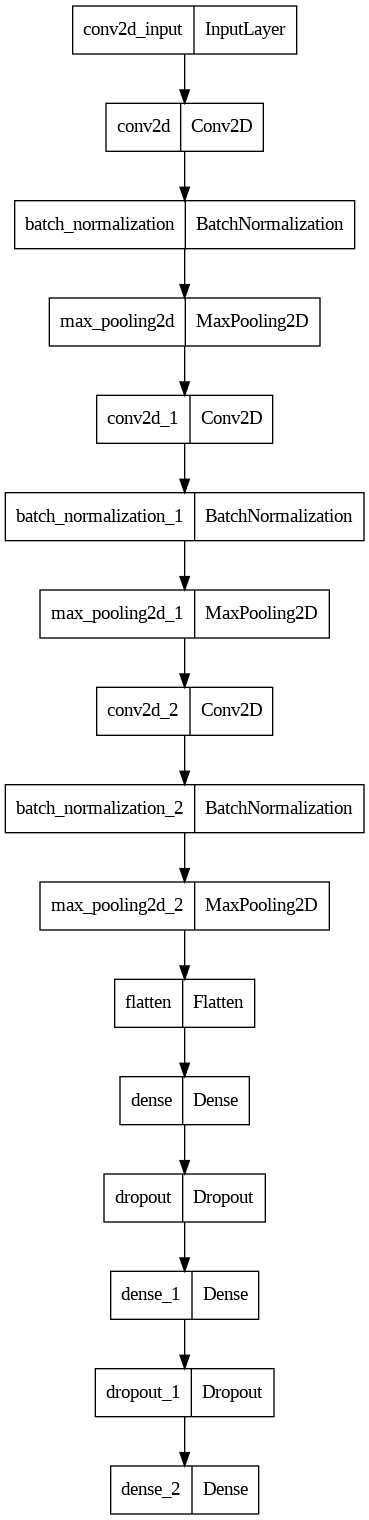

In [ ]:
plot_model(model_1)

In [ ]:
#compile the model
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model_1.fit(train_dataset,epochs=10,validation_data=test_dataset)


Epoch 1/10
625/625 [==============================] - 77s 102ms/step - loss: 1.2664 - accuracy: 0.5639 - val_loss: 1.6330 - val_accuracy: 0.4968
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6532 - accuracy: 0.6029 - val_loss: 0.6438 - val_accuracy: 0.6560
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5899 - accuracy: 0.6622 - val_loss: 0.8656 - val_accuracy: 0.6268
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5029 - accuracy: 0.7337 - val_loss: 0.5464 - val_accuracy: 0.7326
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4249 - accuracy: 0.7906 - val_loss: 0.4658 - val_accuracy: 0.7920
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3753 - accuracy: 0.8167 - val_loss: 0.5668 - val_accuracy: 0.7660
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3311 - accuracy: 0.8429 - val_loss: 0.5960 - val_ac

In [ ]:
import matplotlib.pyplot as plt

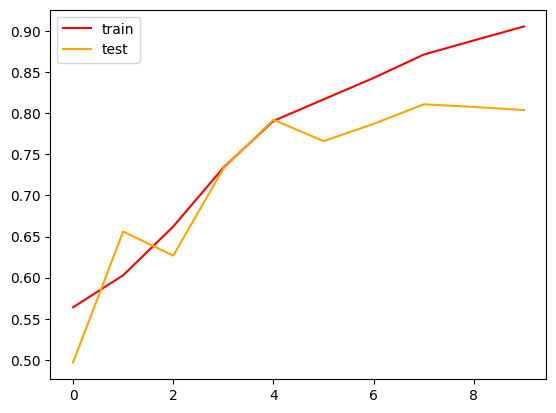

In [ ]:
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'orange',label = 'test')
plt.legend()
plt.show()


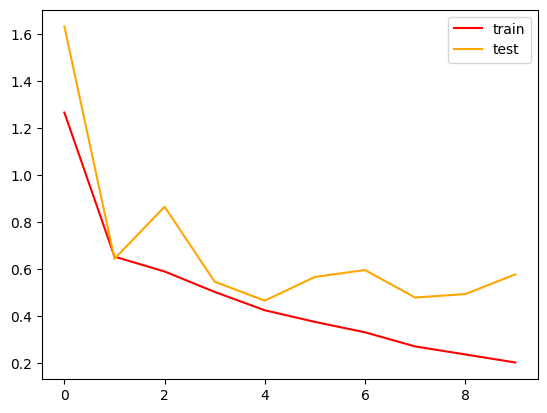

In [ ]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'orange',label = 'test')
plt.legend()
plt.show()


In [ ]:
import cv2


In [ ]:
test_img_1 = cv2.imread('/content/cat2.jpg')

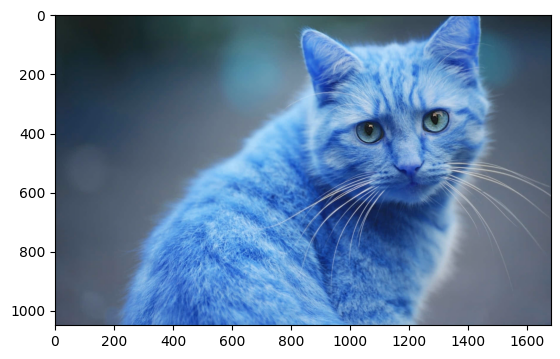

In [ ]:
plt.imshow(test_img_1)

In [ ]:
test_img_1.shape

(1050, 1680, 3)

In [ ]:
test_img_1 = cv2.resize(test_img_1, (256, 256))

In [ ]:
test_input = test_img_1.reshape((1,256,256,3))

In [ ]:
model_1.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img_1 = cv2.imread('/content/dog1.jpg')

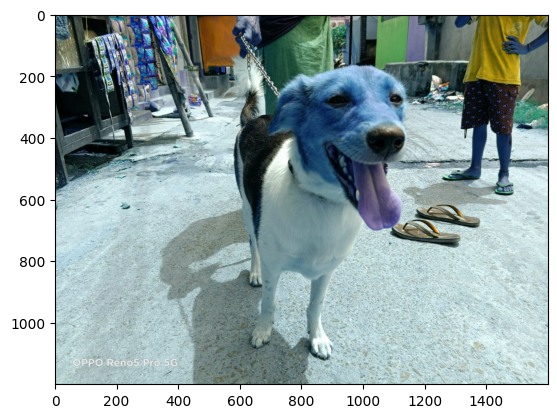

In [ ]:
plt.imshow(test_img_1)

In [ ]:
test_img_1.shape


(1200, 1600, 3)

In [ ]:
test_img_1 = cv2.resize(test_img_1, (256, 256))

In [ ]:
test_input = test_img_1.reshape((1,256,256,3))

In [ ]:
model_1.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)